In [2]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from iminuit import Minuit
from iminuit.cost import LeastSquares

df = pd.read_excel(r"C:\Users\dario\Lab4\Esp_fibra_ottica\Apertura_numerica_e_dispersione_spaziale.xlsx",
                   skiprows=1, nrows=95, usecols="P:V")

df

,10,h fisso,h mobile,h (μm),passo,P (mW),Err P
0,1,13.0,0,13000,0,102.900,0.100
1,2,12.5,40,12900,100,102.800,0.100
2,3,12.5,30,12800,200,102.800,0.100
3,4,12.5,20,12700,300,102.800,0.100
4,5,12.5,10,12600,400,102.900,0.100
...,...,...,...,...,...,...,...
90,91,3.5,40,3900,9100,0.152,0.001
91,92,3.5,20,3700,9300,0.141,0.001
92,93,3.5,4,3540,9460,0.131,0.001
93,94,3.0,44,3440,9560,0.124,0.001


In [3]:

h = np.array(df["passo"])
P =np.array(df["P (mW)"])
err_P = np.array(df["Err P "])
err_h = 10 

# fig = plt.figure(figsize = (6,4))
# # plt.plot(h,P, marker = ".", linestyle  = "", markersize  = 3, label = "dati sperimentali")
# plt.errorbar(h,P , yerr = err_P, xerr = err_h, fmt = ".", label = "dati sperimentali")
# plt.xlabel("Height (m)")
# plt.ylabel("Power (uW)")
# plt.title("P vs h")
# plt.legend()
# plt.grid(alpha = 0.5)
# plt.show()

In [4]:
err_h_rel  = 10/h
# print(err_h_rel)
# print(err_P/P)



C:\Users\dario\AppData\Local\Temp\ipykernel_18124\1491475655.py:1: RuntimeWarning: divide by zero encountered in divide
  err_h_rel  = 10/h


In [5]:
P_max =  np.max(P)
P_max_mezzi = P_max/2
diff = 1
p_index = np.abs(P - P_max_mezzi).argmin()
h0 = h[p_index]

print(f"valore in corrispondenza di P_max/2 : h = {h0} um")
print(P_max_mezzi)

valore in corrispondenza di P_max/2 : h = 4800 um
51.45


In [6]:
w = h0*np.sqrt(2)
print(f"prima stima della larghezza della gaussiana: w = {w:.2f}")



prima stima della larghezza della gaussiana: w = 6788.23


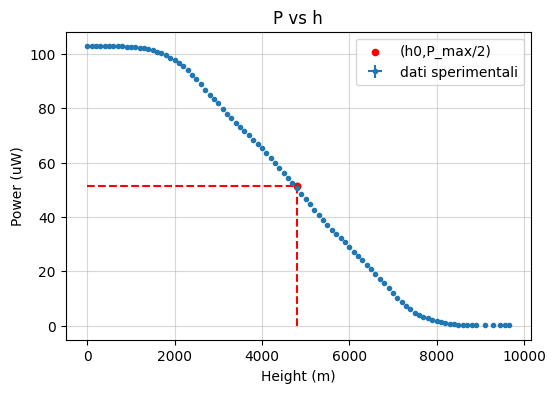

In [7]:
fig = plt.figure(figsize = (6,4))
# plt.plot(h,P, marker = ".", linestyle  = "", markersize  = 3, label = "dati sperimentali")
plt.errorbar(h,P , yerr = err_P, xerr = err_h, fmt = ".", label = "dati sperimentali")
plt.scatter([h0,h0], [P_max_mezzi, P_max_mezzi], color = "red", s=20, label = "(h0,P_max/2)")
plt.vlines(h0,0, P_max_mezzi, color = "red", linestyles= "--" )
plt.hlines(P_max_mezzi, 0, h0, color ="red", linestyles= "--" )
plt.xlabel("Height (m)")
plt.ylabel("Power (uW)")
plt.title("P vs h")
plt.legend()
plt.grid(alpha = 0.5)
plt.show()

## Derivata AMMANO

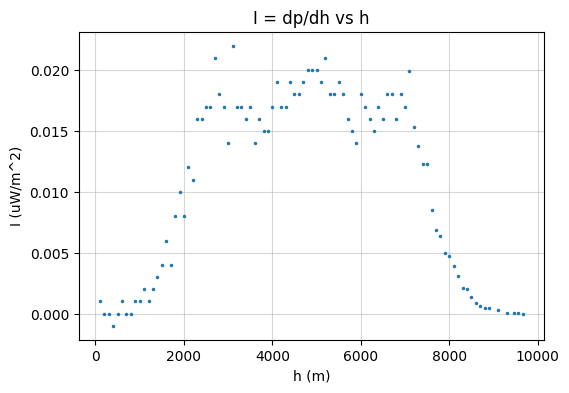

In [8]:
delta_P = P[1:] - P[:-1]
delta_h = h[1:] - h[:-1]


I = -delta_P / delta_h
fig = plt.figure(figsize = (6,4))
plt.plot(h[1:],I, marker = ".", linestyle  = "", markersize  = 3)
plt.xlabel("h (m)")
plt.ylabel("I (uW/m^2)")
plt.title("I = dp/dh vs h")
plt.grid(alpha = 0.5)
plt.show()
    

## Derivata con GRADIENT

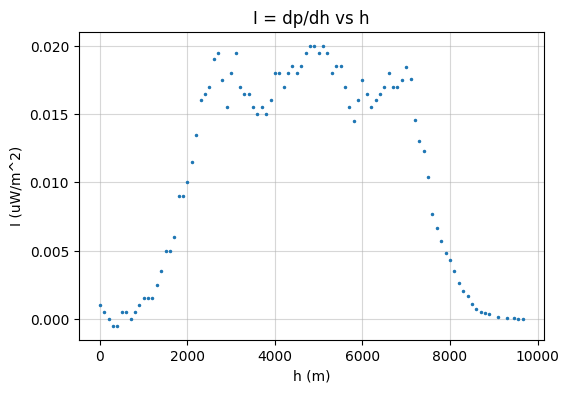

In [9]:
I_grad = -np.gradient(P,h)
fig = plt.figure(figsize = (6,4))
plt.plot(h, I_grad, marker = ".", linestyle  = "", markersize  = 3)
plt.xlabel("h (m)")
plt.ylabel("I (uW/m^2)")
plt.title("I = dp/dh vs h")
plt.grid(alpha = 0.5)
plt.show()


In [10]:
print(len(err_P[:-1]))
print(type(err_P[:-1]))
print(len(delta_h))

94
<class 'numpy.ndarray'>
94


In [11]:
def Gauss(x, A, mu, sigma):
    return A*np.exp(-((x - mu)/sigma)**2/2)/np.sqrt(2*np.pi*sigma**2)

In [12]:
err_I = 2 * np.sqrt(err_P[:-1]**2/delta_h**2 + err_h**2 * delta_P**2 / delta_h**4)
# print(err_I)
least_squares = LeastSquares(h[:-1], I, err_I, Gauss)
m0 = Minuit(least_squares, 1, 4500,1000, name = ("A", "mu", "sigma"))
m0.migrad()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 376.5 (χ²/ndof = 4.1)      │              Nfcn = 235              │
│ EDM = 4.7e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │   86.5    │    2.8    │            │            │         │         │       │
│ 1 │ mu    │  4.45e3   │  0.07e3   │            │            │         │         │       │
│ 2 │ sigma │  1.441e3  │  0.025e3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │        A       mu    sigma │
├───────┼────────────────────────────┤
│     A │     7.63      -50        7 │
│    mu │      -50 5.59e+03   -1.8e3 │
│ sigma │        7   -1.8e3      639 │
└───────┴────────────────────────────┘

In [13]:
print(m0.values)
A_fit, mu_fit, sigma_fit = m0.values[0], m0.values[1], m0.values[2]
err_A_fit, err_mu_fit, err_sigma_fit = m0.errors[0], m0.errors[1], m0.errors[2]
print(f"Parametri ricavati dal fit:\nFattore di scala A = {A_fit:.2f} +- {err_A_fit:.2f}\nmu = {mu_fit:.2f} +- {err_mu_fit:.2f}\nsigma = {sigma_fit:.2f} +- {err_sigma_fit:.2f}")

<ValueView A=86.52714244353108 mu=4447.420351494714 sigma=1440.657038090421>
Parametri ricavati dal fit:
Fattore di scala A = 86.53 +- 2.76
mu = 4447.42 +- 74.79
sigma = 1440.66 +- 25.27


In [14]:
# definisco un nuovo errore sulle y

err_I_new_square = err_I**2 + ((A_fit/np.sqrt(2*np.pi*sigma_fit**2))* (h[:-1] - mu_fit)/sigma_fit**2 * np.exp(-((h[:-1] - mu_fit)/sigma_fit)**2/2))**2 * err_h
err_I_new = np.sqrt(err_I_new_square)
least_squares1 = LeastSquares(h[:-1], I, err_I_new, Gauss)
m1 = Minuit(least_squares1, 1, 4500,1000, name = ("A1", "mu1", "sigma1"))
m1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 376.2 (χ²/ndof = 4.1)      │              Nfcn = 215              │
│ EDM = 3.41e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A1     │   86.6    │    2.8    │            │            │         │         │       │
│ 1 │ mu1    │  4.45e3   │  0.07e3   │            │            │         │         │       │
│ 2 │ sigma1 │  1.441e3  │  0.025e3  │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       A1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     A1 │     7.63      -50        7 │
│    mu1 │      -50 5.59e+03   -1.8e3 │
│ sigma1 │        7   -1.8e3      639 │
└────────┴────────────────────────────┘

In [15]:
A1_fit, mu1_fit, sigma1_fit = m1.values[0], m1.values[1], m1.values[2]
err_A1_fit, err_mu1_fit, err_sigma1_fit = m1.errors[0], m1.errors[1], m1.errors[2]
print(f"Parametri ricavati dal secondo fit con errori riscalati:\nFattore di scala A1 = {A1_fit:.2f} +- {err_A1_fit:.2f}\nmu1 = {mu1_fit:.2f} +- {err_mu1_fit:.2f}\nsigma1 = {sigma1_fit:.2f} +- {err_sigma1_fit:.2f}")

Parametri ricavati dal secondo fit con errori riscalati:
Fattore di scala A1 = 86.55 +- 2.76
mu1 = 4447.62 +- 74.76
sigma1 = 1440.81 +- 25.27


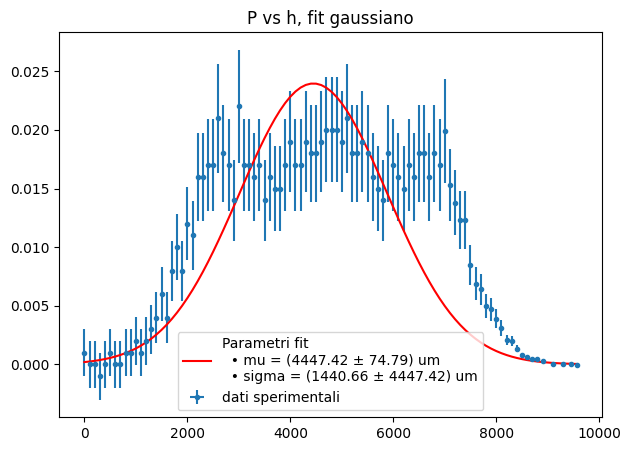

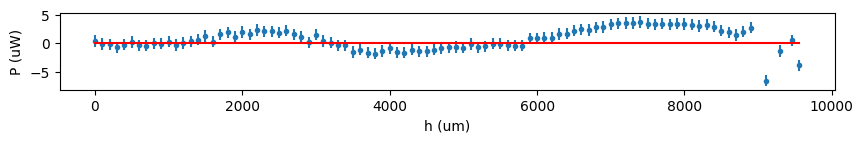

In [27]:
plt.figure(figsize=(7,5))
plt.errorbar(h[:-1],I, yerr = err_I, xerr = err_h, fmt = ".", label = "dati sperimentali")
label_fit = (
    "Parametri fit"
    "\n  • " + f"mu = ({mu_fit:.2f} ± {err_mu_fit:.2f}) um"
    "\n  • " + f"sigma = ({sigma_fit:.2f} ± {mu_fit:.2f}) um"
)
plt.plot(
    h[:-1],
    Gauss(h[:-1], A_fit, mu_fit, sigma_fit),
    color="red",
    label=label_fit)
plt.title("P vs h, fit gaussiano")

plt.legend()

# plot dei residui

plt.figure(figsize=(10,1),dpi=100)
plt.errorbar(h[:-1], (I- Gauss(h[:-1], A_fit, mu_fit, sigma_fit)) / err_I, 1, fmt=".", zorder=1)

plt.plot([h[:-1].min(), h[:-1].max()], [0,0], zorder = 2, color = "red")
plt.xlabel("h (um)")

plt.ylabel("P (uW)")

plt.show()